`git log  --oneline --pretty="" --numstat > git_oneline_numstat.log`

In [29]:
import pandas as pd

commits = pd.read_csv("../../../intellij-community/git_oneline_numstat.log", 
            header=None, 
            sep='\t',
            names=["additions", "deletions", "filename"])
commits.head()

,additions,deletions,filename
0,5,1,platform/platform-api/src/com/intellij/openapi...
1,12,6,platform/lang-impl/src/com/intellij/ide/projec...
2,13,43,java/java-analysis-impl/src/com/intellij/codeI...
3,1,1,java/java-analysis-impl/src/com/intellij/codeI...
4,0,1,java/java-psi-api/src/com/intellij/psi/PsiUses...


In [30]:
commits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826173 entries, 0 to 826172
Data columns (total 3 columns):
additions    826173 non-null object
deletions    826173 non-null object
filename     826173 non-null object
dtypes: object(3)
memory usage: 18.9+ MB


In [32]:
commits['additions'] = pd.to_numeric(commits['additions'], errors='coerce')
commits['deletions'] = pd.to_numeric(commits['deletions'], errors='coerce')
commits.head()

,additions,deletions,filename
0,5.0,1.0,platform/platform-api/src/com/intellij/openapi...
1,12.0,6.0,platform/lang-impl/src/com/intellij/ide/projec...
2,13.0,43.0,java/java-analysis-impl/src/com/intellij/codeI...
3,1.0,1.0,java/java-analysis-impl/src/com/intellij/codeI...
4,0.0,1.0,java/java-psi-api/src/com/intellij/psi/PsiUses...


In [37]:
changes_per_file=commits.groupby('filename').count()\
.sort_values(by="additions", ascending=False)
changes_per_file.tail(10)

,additions,deletions
filename,,
plugins/junit5_rt/lib/junit-vintage-engine-4.12.0-M2.jar,0,0
plugins/junit5_rt/lib/junit-vintage-engine-4.12.0-M5.jar,0,0
plugins/junit5_rt/lib/opentest4j-1.0.0-M1.jar,0,0
plugins/junit5_rt/lib/junit-vintage-engine-4.12.0-M6.jar,0,0
plugins/junit5_rt/lib/junit-vintage-engine-4.12.0-RC2.jar,0,0
plugins/junit5_rt/lib/junit-vintage-engine-4.12.0.jar,0,0
plugins/junit5_rt/lib/junit4-engine-5.0.0-ALPHA.jar,0,0
plugins/junit5_rt/lib/junit4-runner-5.0.0-ALPHA.jar,0,0
plugins/junit5_rt/lib/junit5-engine-5.0.0-ALPHA.jar,0,0


In [26]:
changes_per_file[changes_per_file['additions'] > changes_per_file['additions'].quantile(0.9999)]

,additions,deletions
filename,,
resources/src/META-INF/IdeaPlugin.xml,920,920
platform/util/resources/misc/registry.properties,889,889
platform/platform-impl/src/com/intellij/openapi/editor/impl/EditorImpl.java,849,849
plugins/groovy/src/META-INF/plugin.xml,791,791
python/src/META-INF/python-plugin-common.xml,601,601
platform/platform-resources/src/META-INF/LangExtensions.xml,545,545
plugins/groovy/src/org/jetbrains/plugins/groovy/annotator/GroovyAnnotator.java,541,541
platform/util/src/com/intellij/util/ui/UIUtil.java,535,535
plugins/InspectionGadgets/src/com/siyeh/InspectionGadgetsBundle.properties,523,523


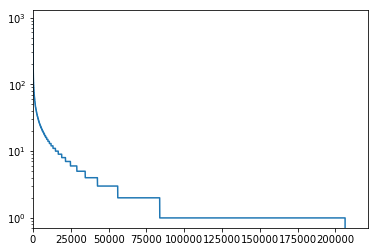

In [4]:
changes_per_file.reset_index()['additions'].plot(logy=True)